In [1]:
%store -r df_pca
%store -r df
%store -r df_selected

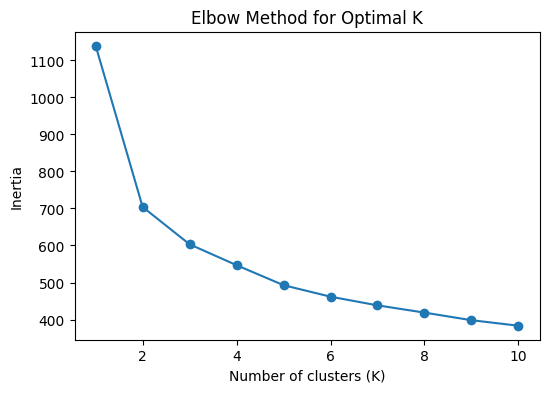

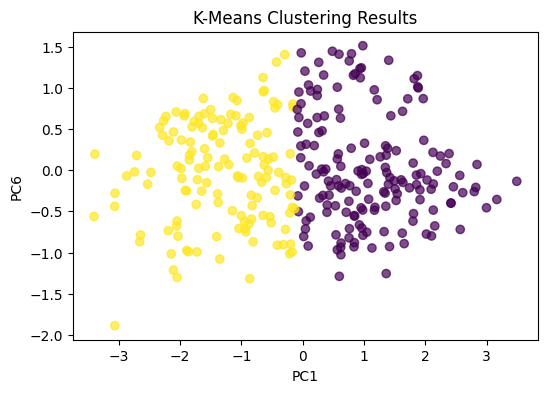

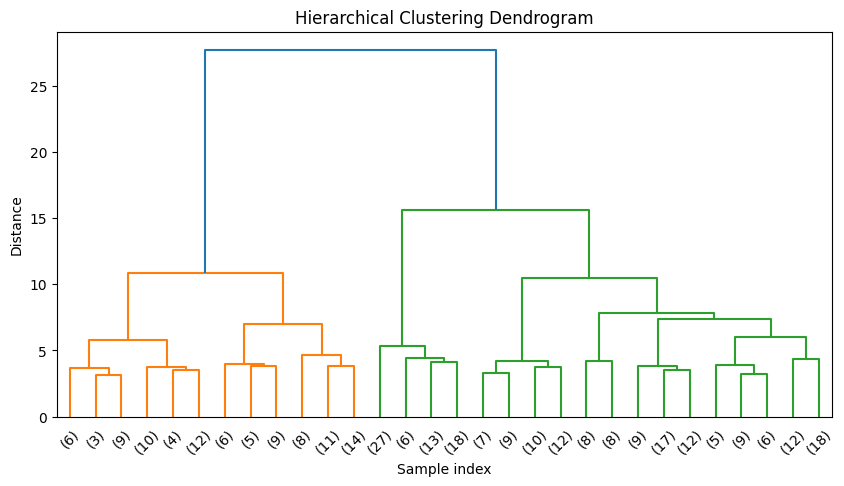

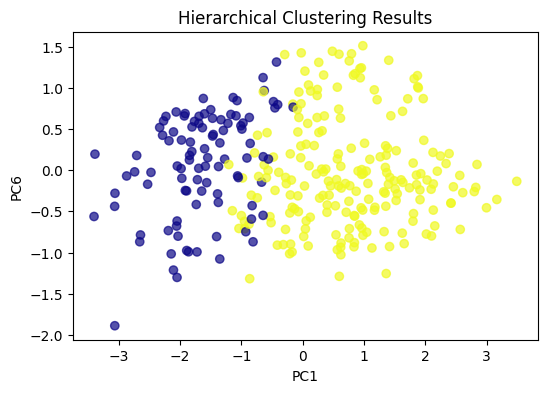

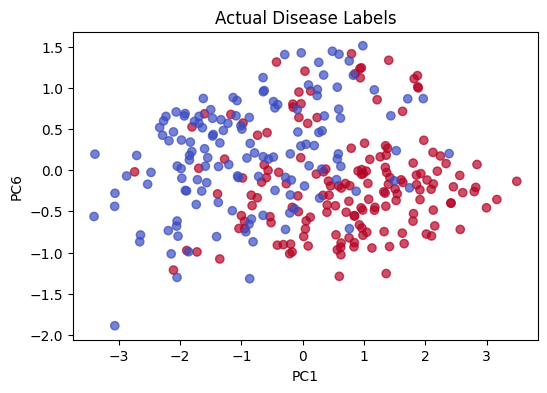

In [2]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt

# 1. K-Means Clustering (Elbow Method)
X = df_selected.drop('target', axis=1)

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose K (e.g., 2 for disease/no disease)
k_opt = 2
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X['PC1'], X['PC6'], c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC6')
plt.title('K-Means Clustering Results')
plt.show()

# 2. Hierarchical Clustering (Dendrogram)
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Assign clusters from hierarchical clustering
clusters_hier = fcluster(linked, k_opt, criterion='maxclust')

plt.figure(figsize=(6,4))
plt.scatter(X['PC1'], X['PC6'], c=clusters_hier, cmap='plasma', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC6')
plt.title('Hierarchical Clustering Results')
plt.show()

# 3. Compare clusters with actual disease labels
plt.figure(figsize=(6,4))
plt.scatter(X['PC1'], X['PC6'], c=df_selected['target'], cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC6')
plt.title('Actual Disease Labels')
plt.show()